# Classification experiments with native `fasttext` classifier

## Contents:
* imports & dataset initialization
* Single classification sample
* Serial classification experiments (8 Experiments)
* Training pretrained Word2Vec - ???

**Dataset:** top 250 best films + top 400 popular films + low-rating films (Complete dataset)

**Dataset shape:** $(90646, 2)$

**Reviews:** depends on experiment

In [1]:
%cd ../..

/home/pristalovya/Документы/nlp-coursework


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dill

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression 
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer, WhitespaceTokenizer
import nltk
from sklearn.utils import resample

from pprint import pprint

import fasttext

from src.nlp.embeddings import corp2vecs

np.set_printoptions(threshold=np.inf)

data.shape=(90646, 2)
POSITIVE    69219
NEUTRAL     11579
NEGATIVE     9848
Name: label, dtype: int64


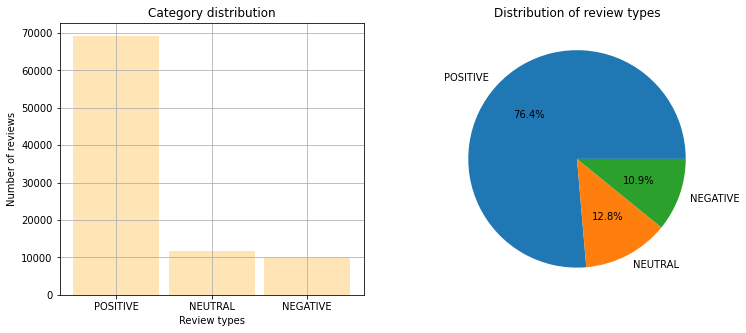

(55346, 2) (23721, 2)


,review,label
54700,фильм стоить выходить предел великобритания . ...,0
67873,это самый впечатляющий по-настоящему жуткий фи...,2
44030,первый часть ' чужой ' свой время произвести в...,2
21503,история начинающий барабанщик эндрю зародиться...,2
75163,дождаться . прокат выйти новый кинолента амери...,2
...,...,...
6265,"весь равный мера свойственно злорадствовать , ...",0
54886,"неординарный фильм . , уверить — книга всё чёт...",2
76820,"сильно заинтересованный ' дэдпул ' , однако уз...",2
860,"фильм , который неизменно занимать первый мест...",2


In [12]:
# Open dataset
with open('reviews_Review_Label_rutokenizer_nltk.df', 'rb') as f:
    data = dill.load(f)
print(f'{data.shape=}')
print(data.label.value_counts())

# Basic visual
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(data.label.value_counts().index, 
       data.label.value_counts().values, 
       color = 'moccasin', width = 0.9)
ax[0].set_title("Category distribution")
ax[0].set_xlabel("Review types")
ax[0].set_ylabel("Number of reviews")
ax[0].grid(True)

ax[1].pie(data.label.value_counts(), labels=data.label.value_counts().index, autopct='%1.1f%%')
ax[1].set_title('Distribution of review types')

plt.show()

# Basic preprocessing
label_encoding = {
    'POSITIVE': 2,
    'NEUTRAL': 1,
    'NEGATIVE': 0
}

data.label = data.label.apply(lambda label: label_encoding[label])
data = data[data.label != 1].reset_index().drop(columns=['index'])
train, test = train_test_split(data, test_size=0.3, random_state=42)

print(train.shape, test.shape)
train

In [7]:
cudf.DataFrame(data)

,review,label
0,период конец девяностый год - начало двухтысяч...,2
1,"очень сложно писать рецензия фильм , это прост...",2
2,любимый многий миллион ценитель киноискусство ...,2
3,"наш мир существовать разный фильм . цеплять , ...",2
4,1999 год фильм увидеть . показывать местный тв...,2
...,...,...
79062,"начать , фильм история создание бренд ламборги...",2
79063,", фильм - хороший представитель жанр ' биограф...",2
79064,фильм « ламборгиня : человек - легенда » снято...,0
79065,"эй , рагацци , это серьёзно , показывать италь...",0


### Experiment 1

**Tokenizer:** [`razdel`]

**Stopwords:** [`nltk`]

**Model:** `LogisticRegression`

**Vectorizer:** `fasttext`, 500

**Comments:** *Unbalanced dataset*

In [4]:
EMB_SIZE = 500

%time model, X_train = corp2vecs(train.review, model_type='fasttext', emb_size=EMB_SIZE, train=True)
%time _, X_test  = corp2vecs(test.review, model_type='fasttext', emb_size=EMB_SIZE, pretrained_model=model, train=False)

clf = LogisticRegression(max_iter=200, n_jobs=-1, random_state=42)
%time clf.fit(X_train, train.label)
pred = clf.predict(X_test)

print(classification_report(test.label, pred))

Turning documents to lists of tokens...
Training NEW fasttext model on given documents...
Vectorizing each document...
Vectorization finished!
Wall time: 25min 33s
Turning documents to lists of tokens...
Provided with pretrained fasttext model. Training skipped.
Vectorizing each document...
Vectorization finished!
Wall time: 2min 31s
Wall time: 53.6 s
              precision    recall  f1-score   support

           0       0.84      0.54      0.66      2979
           2       0.94      0.99      0.96     20742

    accuracy                           0.93     23721
   macro avg       0.89      0.76      0.81     23721
weighted avg       0.93      0.93      0.92     23721



In [5]:
model.save_model('models/fasttext_500.model')

In [6]:
vectors = fasttext.load_model('models/fasttext_500.model')
vectors.get_nearest_neighbors('бизнес', k=30)

[(0.7738540768623352, 'шоубизнес'),
 (0.7492939233779907, 'бизнесса'),
 (0.747549831867218, 'бизнесвумен'),
 (0.7373790740966797, 'наркобизнес'),
 (0.6598356366157532, 'кинобизнес'),
 (0.6596353054046631, 'бизнессмен'),
 (0.6566493511199951, 'шоу-бизнес'),
 (0.5624692440032959, 'бизнесмен'),
 (0.4625374674797058, 'нелегальный'),
 (0.4506511688232422, 'легальный'),
 (0.4392744302749634, 'марихуана'),
 (0.4381403625011444, 'марихуановый'),
 (0.4317106306552887, 'наркобарон'),
 (0.42738330364227295, 'полулегальный'),
 (0.421903133392334, 'наркоторговля'),
 (0.4198996126651764, 'торговля'),
 (0.4152900278568268, 'фитнес'),
 (0.4103153347969055, 'нелегально'),
 (0.40561527013778687, 'инвестиция'),
 (0.40283921360969543, 'креветочный'),
 (0.40274742245674133, 'наркоделец'),
 (0.40040338039398193, 'пирсон'),
 (0.39890414476394653, 'инвестиционный'),
 (0.39773961901664734, 'нелегал'),
 (0.39628562331199646, 'банкротство'),
 (0.39549025893211365, 'незаконный'),
 (0.3936193585395813, 'биржа'),
 

### Experiment 2

**Tokenizer:** [`razdel`]

**Stopwords:** [`nltk`]

**Model:** `LogisticRegression`
* **class_weight =** 'balanced'

**Vectorizer:** `fasttext`, 500

**Comments:** *Unbalanced dataset*

In [6]:
clf = LogisticRegression(max_iter=200, n_jobs=-1, random_state=42, class_weight='balanced')
clf.fit(X_train, train.label)
pred = clf.predict(X_test)

print(classification_report(test.label, pred))

              precision    recall  f1-score   support

           0       0.51      0.89      0.65      2979
           2       0.98      0.88      0.93     20742

    accuracy                           0.88     23721
   macro avg       0.75      0.88      0.79     23721
weighted avg       0.92      0.88      0.89     23721



---

## Exploration of native `fasttext`'s classification facilities 

### Experiment 1

**Tokenizer:** [`razdel`, `rutokenizer`]

**Stopwords:** [`[]`, `nltk`]

**Model:** `fasttext.train_supervised(...)`

**Comments:** *Unbalanced dataset* $&&$ *text target*

In [7]:
for _tokenizer in ['razdel', 'rutokenizer']:
    for i, _stopwords in enumerate([[], 'nltk_void']):        
        i_to_sw_name = {0: 'no', 1: 'nltk'}
        
        with open(f'reviews_Review_Label_{_tokenizer}_{i_to_sw_name[i]}.df', 'rb') as file:
            data = dill.load(file)
            print(f"Data was loaded from '{file.name}'")
        
        print(f'{_tokenizer=}, stopwords={i_to_sw_name[i]}')
        print(f'{data.shape=}\n')
        
        # Basic preprocessing
        data = data[data.label != 'NEUTRAL'].reset_index().drop(columns=['index'])
        train, test = train_test_split(data, test_size=0.3, random_state=42)
        
        with open('_train_supervised.tmp', 'wt', encoding='UTF-8') as f:
            for review, lbl in zip(train.review, train.label):
                f.write(f'__label__{lbl} {review}\n')
        print('Training model...')
        
        %time model = fasttext.train_supervised('_train_supervised.tmp', thread=12, epoch=30, wordNgrams=3, loss='hs')
        
        print('Predicting...')
        pred = list(map(lambda label: label[0][9:], model.predict(test.review.to_list())[0]))

        print(classification_report(test.label, pred))
        
        print('\n---------------------------------------------------------------\n')

Data was loaded from 'reviews_Review_Label_razdel_no.df'
_tokenizer='razdel', stopwords=no
data.shape=(90646, 2)

Training model...
Wall time: 2min 2s
Predicting...
              precision    recall  f1-score   support

    NEGATIVE       0.90      0.80      0.84      2979
    POSITIVE       0.97      0.99      0.98     20742

    accuracy                           0.96     23721
   macro avg       0.94      0.89      0.91     23721
weighted avg       0.96      0.96      0.96     23721


---------------------------------------------------------------

Data was loaded from 'reviews_Review_Label_razdel_nltk.df'
_tokenizer='razdel', stopwords=nltk
data.shape=(90646, 2)

Training model...
Wall time: 1min 29s
Predicting...
              precision    recall  f1-score   support

    NEGATIVE       0.90      0.79      0.84      2979
    POSITIVE       0.97      0.99      0.98     20742

    accuracy                           0.96     23721
   macro avg       0.93      0.89      0.91     23721


### Experiment 2

**Tokenizer:** [`razdel`, `rutokenizer`]

**Stopwords:** [`[]`, `nltk`]

**Model:** `fasttext.train_supervised(...)`

**Comments:** *Balanced dataset* $&&$ *text target*

In [6]:
for _tokenizer in ['razdel', 'rutokenizer']:
    for i, _stopwords in enumerate([[], 'nltk_void']):        
        i_to_sw_name = {0: 'no', 1: 'nltk'}
        
        with open(f'reviews_Review_Label_{_tokenizer}_{i_to_sw_name[i]}.df', 'rb') as file:
            data = dill.load(file)
            print(f"Data was loaded from '{file.name}'")
        
        print(f'{_tokenizer=}, stopwords={i_to_sw_name[i]}')
        print(f'{data.shape=}\n')
        
        # Basic preprocessing
        data = data[data.label != 'NEUTRAL'].reset_index().drop(columns=['index'])
        train, test = train_test_split(data, test_size=0.3, random_state=42)
        
        train = pd.concat([train, resample(train[train.label == 'NEGATIVE'], n_samples=41500, random_state=42)])
        print(f'{train.shape=}\n')
        
        with open('_train_supervised.tmp', 'wt', encoding='UTF-8') as f:
            for review, lbl in zip(train.review, train.label):
                f.write(f'__label__{lbl} {review}\n')
        print('Training model...')
        
        %time model = fasttext.train_supervised('_train_supervised.tmp', thread=12, epoch=30, wordNgrams=3, loss='hs')
        
        print('Predicting...')
        pred = list(map(lambda label: label[0][len(model.label):], model.predict(test.review.to_list())[0]))

        print(classification_report(test.label, pred))
        
        print('\n---------------------------------------------------------------\n')

Data was loaded from 'reviews_Review_Label_razdel_no.df'
_tokenizer='razdel', stopwords=no
data.shape=(90646, 2)

train.shape=(96846, 2)

Training model...
Wall time: 3min 19s
Predicting...
              precision    recall  f1-score   support

    NEGATIVE       0.86      0.87      0.87      2979
    POSITIVE       0.98      0.98      0.98     20742

    accuracy                           0.97     23721
   macro avg       0.92      0.92      0.92     23721
weighted avg       0.97      0.97      0.97     23721


---------------------------------------------------------------

Data was loaded from 'reviews_Review_Label_razdel_nltk.df'
_tokenizer='razdel', stopwords=nltk
data.shape=(90646, 2)

train.shape=(96846, 2)

Training model...
Wall time: 2min 28s
Predicting...
              precision    recall  f1-score   support

    NEGATIVE       0.86      0.85      0.86      2979
    POSITIVE       0.98      0.98      0.98     20742

    accuracy                           0.96     23721
   ma

### \_\_Magic fail\_\_ ¯\\_(ツ)_/¯

In [3]:
with open('reviews_Review_Label_razdel_nltk.df', 'rb') as f:
    data = dill.load(f)
data

,review,label
0,« зелёный миля » смотреть : 10 год назад . пер...,NEUTRAL
1,период конец девяностый годов-начало двухтысяч...,POSITIVE
2,"очень сложно писать рецензия фильм , это прост...",POSITIVE
3,любимый многий миллион ценитель киноискусство ...,POSITIVE
4,"наш мир существовать разный фильм . цеплять , ...",POSITIVE
...,...,...
90641,", фильм - хороший представитель жанр ' биограф...",POSITIVE
90642,фильм « ламборгиня : человек-легенда » снятой ...,NEGATIVE
90643,"эй , рагацци , это серьёзно , показывать италь...",NEGATIVE
90644,"вообще , говорить байопик , стоить отметить , ...",NEGATIVE


In [30]:
import re

text = 'Me\nwent to school\n'
print(text)
re.sub('\n', '', text)

Me
went to school



'Mewent to school'

In [15]:
model.predict(['Я пошел гулять', 'Я тоже'])[0]

[['__label__POSITIVE'], ['__label__POSITIVE']]

In [20]:
with open('_train_supervised.tmp', 'rt', encoding='UTF-8') as f:
    print(f.read()[:10000])

__label__POSITIVE Период конца девяностых годов-начало двухтысячных подарил нам большое количество великолепных и качественных кинолент, которые до сегодняшнего дня мы пересматриваем и каждый раз получаем удовольствие, 'Зелёная миля' режиссёра Фрэнка Дарабонта как раз из тех фильмов, и который я также совсем недавно пересмотрел. Фильм снят по мотивам романа Стивена Кинга 'Зеленая Миля'. 



   Главную роль исполнил легендарный Том Хэнкс, который давно уже вошёл в список Голливуда как один из лучших харизматичных и талантливых актёров. События в картине разворачиваются в 1935 году, Том иполнил роля начальника тюремного блока смертников по имени Пол Эджкомб. Работа не самая приятная, так как каждый день приходится иметь дело с омерзительными личностями, сидящими в тюремных камерах, хотя не все эти личности и омерзительные, некоторые из выглядят вполне нормальными людьми, но никогда не знаешь о чём они думают, ведь всё же эти люди совершили убийства, а у Пола также есть проблем со здоровь